In [2]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "NanumGothicCoding"
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
%matplotlib inline

In [23]:
# 성적 데이터 분석
# pandas의 read_excel() 메소드로 엑셀 파일을 읽어와 데이터프레임으로 저장
# pip install xlrd # xlrd 라이브러리 인스톨 필요
df = pd.read_excel("./data/score.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   반       12 non-null     int64 
 1   이름      12 non-null     object
 2   국어      12 non-null     int64 
 3   영어      12 non-null     int64 
 4   수학      12 non-null     int64 
 5   과학      12 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 704.0+ bytes


In [29]:
# 엑셀 파일에서 읽어들인 데이터가 저장된 데이터프레임에 총점과 평균의 파생(계산에 의한) 변수를 추가
subjects = ["국어", "영어", "수학", "과학"]
# df["총점"] = df[["국어", "영어", "수학", "과학"]].sum(axis = 1) # axis가 0이면 행에있는 각 값들을 열을 따라 구하는거라 axis = 0을 주면 안나옴
df["총점"] = df[subjects].sum(axis = 1)
df["평균"] = df[subjects].mean(axis = 1)
df

,반,이름,국어,영어,수학,과학,총점,평균
0,1,성춘향,67,87,90,98,342,85.50
1,1,이몽룡,45,45,56,98,244,61.00
2,1,향단이,95,59,96,88,338,84.50
3,1,방자,65,94,89,98,346,86.50
4,1,월매,45,65,78,98,286,71.50
5,1,변학도,78,76,98,89,341,85.25
6,2,홍길동,87,67,65,56,275,68.75
7,2,임꺽정,89,98,78,78,343,85.75
8,2,전우치,100,78,56,65,299,74.75
9,2,일지매,99,89,87,87,362,90.50


In [19]:
# sort_values() 메소드로 데이터프레임의 특정 열을 기준으로 데이터를 정렬할 수 있다.
# ascending 옵션을 생략하거나 True를 지정하면 오름차순으로 정렬, False를 지정하면 내림차순으로 정렬
# 정렬에 기준으로 사용할 열이 2개 이상이면 리스트로 메소드로 전달하고 지정된 리스트의 0번째가 같으면 1번째를 기준으로 정렬
# sorted_df = df.sort_values(["영어", "국어"], ascending = False)
sorted_df = df.sort_values(["평균"], ascending = False)
sorted_df

,반,이름,국어,영어,수학,과학,총점,평균
9,2,일지매,99,89,87,87,362,90.50
3,1,방자,65,94,89,98,346,86.50
7,2,임꺽정,89,98,78,78,343,85.75
0,1,성춘향,67,87,90,98,342,85.50
5,1,변학도,78,76,98,89,341,85.25
2,1,향단이,95,59,96,88,338,84.50
11,2,콩쥐,65,89,87,78,319,79.75
8,2,전우치,100,78,56,65,299,74.75
4,1,월매,45,65,78,98,286,71.50
6,2,홍길동,87,67,65,56,275,68.75


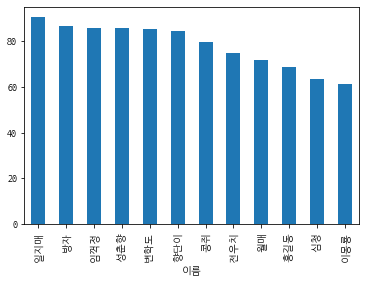

In [21]:
# 평균의 내림차순으로 정렬된 데이터로 막대 그래프를 그림
# x축으로 학생 이름이 출력되지 않고 인덱스가 출력되므로 어떤 학생의 점수인지 알 수 없기에 인덱스를 이름으로 지정
sorted_df.index = sorted_df["이름"]

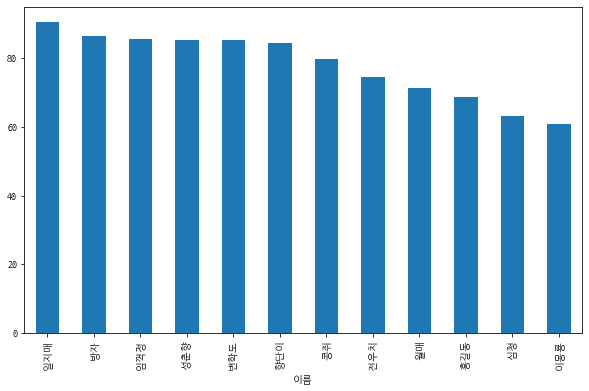

In [22]:
# plot() 메소드로 그래프를 그린다. kind 속성에 bar라고 지정하면 막대그래프를 그릴 수 있고, figsize로 그래프 크기 조절(리스트나 튜플형식 활용)
sorted_df["평균"].plot(kind = "bar", figsize = [10, 6])
# 그래프가 작성되고 난 후 matplotlib 객체의 이름이 출력되므로 show() 메소드를 실행해서 그래프만 출력되게 한다.
plt.show()

1반과 2반의 전체 점수 비교

In [30]:
일반 = df[df["반"] == 1]
일반

,반,이름,국어,영어,수학,과학,총점,평균
0,1,성춘향,67,87,90,98,342,85.50
1,1,이몽룡,45,45,56,98,244,61.00
2,1,향단이,95,59,96,88,338,84.50
3,1,방자,65,94,89,98,346,86.50
4,1,월매,45,65,78,98,286,71.50
5,1,변학도,78,76,98,89,341,85.25


In [31]:
이반 = df[df["반"] == 2]
이반

,반,이름,국어,영어,수학,과학,총점,평균
6,2,홍길동,87,67,65,56,275,68.75
7,2,임꺽정,89,98,78,78,343,85.75
8,2,전우치,100,78,56,65,299,74.75
9,2,일지매,99,89,87,87,362,90.50
10,2,심청,98,45,56,54,253,63.25
11,2,콩쥐,65,89,87,78,319,79.75


In [33]:
일반평균 = 일반["총점"].sum() / (6 * 4)
print(일반평균)
이반평균 = 이반["총점"].sum() / (6 * 4)
print(이반평균)

79.04166666666667
77.125


In [35]:
# 두 데이터의 차이가 2점이 채 되지 않지만 서로 독립적인 두 집단에서 얻어진 수치형 자료로 부터 두 집단의 차이가 유사한지를 파악하는데는
# 독립표본 t-검정(two independent sample t-test)이 유용하다. → scipy 라이브러리의 ttest_ind() 메소드로 바로 계산이 가능
# pip install scipy # scipy 라이브러리 인스톨 필요
import scipy.stats as stats
stats.ttest_ind(일반["평균"], 이반["평균"])
# pvalue값이 > 0.005이므로 두 집단 차이가 없다는 영가설을 채택한다. 즉, 1반과 2반은 유의미한 점수 차이가 없다.

Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)

In [38]:
# 과목별로 차이가 있는가 과목별로 확인해 보자
for sub in subjects:
    print(sub, stats.ttest_ind(일반[sub], 이반[sub]), sep = " : ") # print에 sep = ""옵션으로 출력 값 사이에 구분자를 줄 수 있다.

국어:Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
영어:Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
수학:Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
과학:Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


In [39]:
# 과학과목 점수는 pvalue < 0.005 이므로 차이가 많이 난다는 것을 알 수 있다.
print("1반 과학점수 평균 : ", 일반["과학"].mean())
print("2반 과학점수 평균 : ", 이반["과학"].mean())

1반 과학점수 평균 :  94.83333333333333
2반 과학점수 평균 :  69.66666666666667


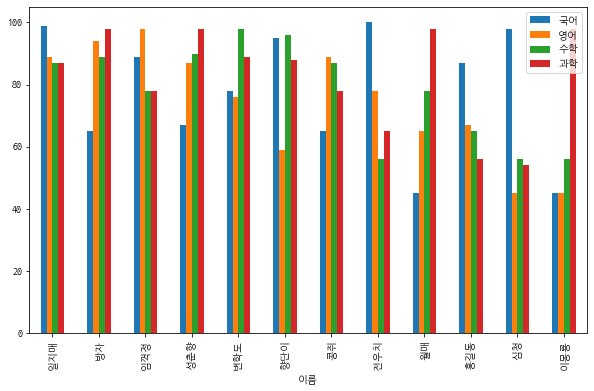

In [41]:
# 과목별 점수의 특징을 파악하기 위해 막대 그래프를 과목별로 그려보자
# 1등은 점수가 고르게 높은데 2등부터는 점수의 편차가 있다.
sorted_df[subjects].plot(kind = "bar", figsize = [10, 6])
plt.show()

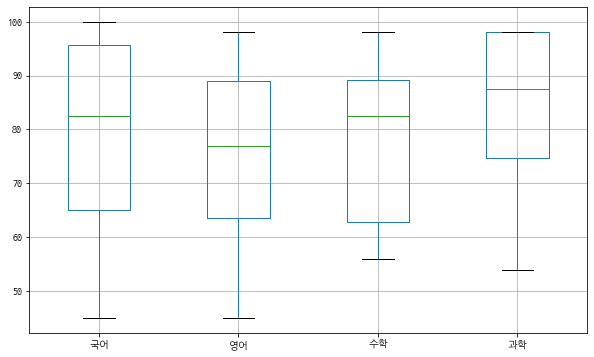

In [42]:
# boxplot 그래프로 과목별 점수 분포 그래프를 그려보자
df[subjects].boxplot(figsize = [10, 6])
plt.show()

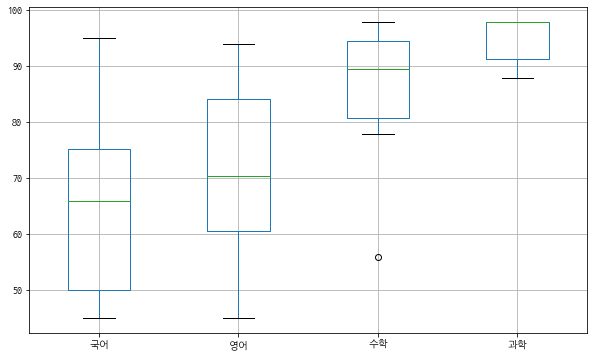

In [44]:
# boxplot 그래프로 과목별 점수 분포 그래프를 그려보자
일반[subjects].boxplot(figsize = [10, 6])
plt.show()

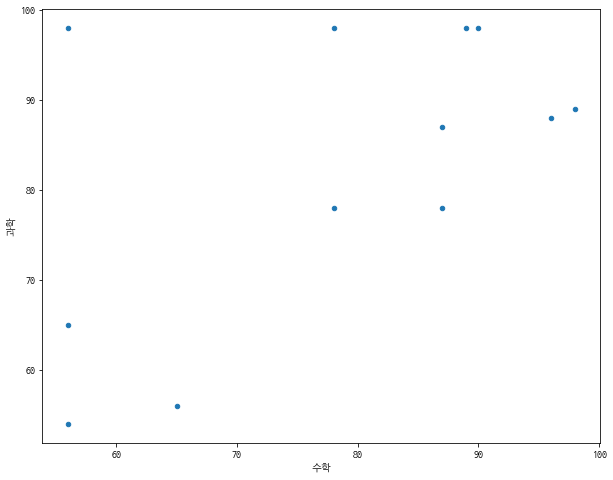

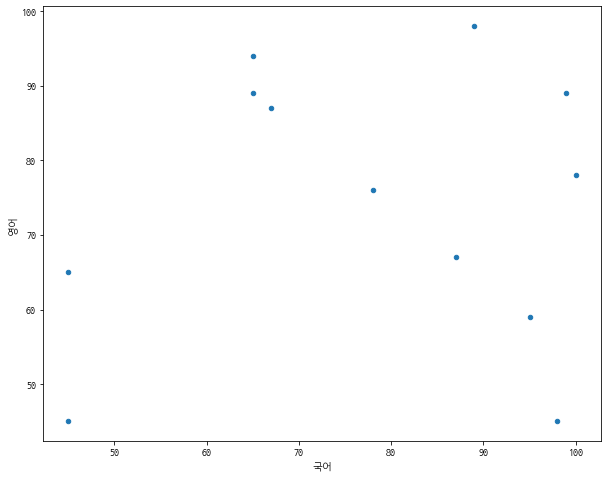

In [50]:
# 과목별 상관도
# 보통 수학점수가 높으면 과학점수가 높을 것이라고 기대하고 국어점수가 높으면 영어점수가 높을 것이라고 기대할 수 있다.
df.plot(kind = "scatter", x = "수학", y = "과학", figsize = [10, 8])
df.plot(kind = "scatter", x = "국어", y = "영어", figsize = [10, 8])
plt.show()

In [53]:
# 복수개의 데이터의 상관 계수를 구해보자
# scipy 라이브러리의 stats 모듈의 피어슨 상관 계수를 구하는 personr() 메소드 활용
print(stats.pearsonr(df["수학"], df["과학"]))
# 앞 숫자가 상관 계수이고 뒷 숫자가 pvlaue를 의미한다.
# 상관 계수가 0.5보다 높으므로 관계가 있기는 하지만 pvalue > 0.005 이므로 유의미한 상관 관계가 있지는 않다.
# → 데이터가 좀 더 많아지면 pvalue가 의미있어지는 경우가 많은데 이 데이터는 모수가 되는 데이터의 개수가 작아서 의미를 찾기 어렵다.
print(stats.pearsonr(df["영어"], df["국어"]))

(0.563289059706775, 0.05650580486155533)
(0.10566562777973995, 0.7437959551857832)


In [54]:
# 학생별로 과목의 강약에 대한 패턴별 특징이 있을텐데, 학생끼리 이러한 성적패턴의 유사성을 비교
# 주 성분 분석(Principle Component Analysis)이 있다. 학생별로 4과목이라는 특성 2개로 축약한 후 2차원 평면에 표시하여 그 종합적인 처리를 한눈에 분석 가능
# 다른말로 차원 축소라고 하기도 한다.
df[subjects]

,국어,영어,수학,과학
0,67,87,90,98
1,45,45,56,98
2,95,59,96,88
3,65,94,89,98
4,45,65,78,98
5,78,76,98,89
6,87,67,65,56
7,89,98,78,78
8,100,78,56,65
9,99,89,87,87


In [55]:
# PCA는 scikit-learn이라는 라이브러리를 설치하면 사용할 수 있다.
# pip install scikit-learn
from sklearn.preprocessing import StandardScaler # 정규화
# StandardScaler(X) : 평균이 0과 표준편차가 1이 되도록 변환한다.
X_std = StandardScaler().fit_transform(df[subjects])
X_std

array([[-0.55809652,  0.72621778,  0.78954203,  1.01066629],
       [-1.70024754, -1.68176748, -1.44749373,  1.01066629],
       [ 0.89555023, -0.87910573,  1.18431305,  0.36897341],
       [-0.66192843,  1.12754865,  0.72374686,  1.01066629],
       [-1.70024754, -0.53510783,  0.        ,  1.01066629],
       [ 0.01297899,  0.09555497,  1.31590339,  0.43314269],
       [ 0.48022259, -0.42044187, -0.8553372 , -1.68444381],
       [ 0.5840545 ,  1.35688058,  0.        , -0.27271947],
       [ 1.15513001,  0.21022093, -1.44749373, -1.10692022],
       [ 1.10321405,  0.84088374,  0.59215653,  0.30480412],
       [ 1.0512981 , -1.68176748, -1.44749373, -1.81278239],
       [-0.66192843,  0.84088374,  0.59215653, -0.27271947]])

In [57]:
# 위의 행렬 데이터가 PCA의 입력으로 사용되고 PCA 분석 함수는 scikit-learn 라이브러리에서 제공된다.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Y = pca.fit_transform(X_std)
Y

array([[-1.56591653, -0.09168753],
       [ 0.11774518,  2.93515218],
       [-0.20727166, -0.38845514],
       [-1.71984653, -0.24234692],
       [-1.11185524,  1.70512415],
       [-1.03327136, -0.43547978],
       [ 1.88205338, -0.20323602],
       [-0.10118555, -1.27408337],
       [ 1.88020684, -0.64411706],
       [-0.39554448, -1.36047251],
       [ 2.98704605,  0.37256038],
       [-0.7321601 , -0.37295837]])

In [62]:
# Y 변수에 저장된 4과목(4차원)을 2차원으로 축약한 데이터 값이 저장된다. 보통 제1주성분, 제2주성분이라고도 한다.
# 이 데이터를 원래 데이터(df)에 추가
pca_df = pd.DataFrame(Y)
pca_df.index = df.index
pca_df.columns = ["PC1", "PC2"]
pca_df

,PC1,PC2
0,-1.565917,-0.091688
1,0.117745,2.935152
2,-0.207272,-0.388455
3,-1.719847,-0.242347
4,-1.111855,1.705124
5,-1.033271,-0.435480
6,1.882053,-0.203236
7,-0.101186,-1.274083
8,1.880207,-0.644117
9,-0.395544,-1.360473


In [63]:
df2 = pd.concat([df, pca_df], axis = 1)
df2

,반,이름,국어,영어,수학,과학,총점,평균,PC1,PC2
0,1,성춘향,67,87,90,98,342,85.50,-1.565917,-0.091688
1,1,이몽룡,45,45,56,98,244,61.00,0.117745,2.935152
2,1,향단이,95,59,96,88,338,84.50,-0.207272,-0.388455
3,1,방자,65,94,89,98,346,86.50,-1.719847,-0.242347
4,1,월매,45,65,78,98,286,71.50,-1.111855,1.705124
5,1,변학도,78,76,98,89,341,85.25,-1.033271,-0.435480
6,2,홍길동,87,67,65,56,275,68.75,1.882053,-0.203236
7,2,임꺽정,89,98,78,78,343,85.75,-0.101186,-1.274083
8,2,전우치,100,78,56,65,299,74.75,1.880207,-0.644117
9,2,일지매,99,89,87,87,362,90.50,-0.395544,-1.360473


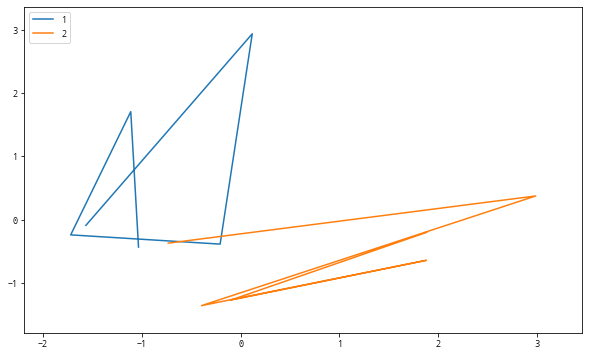

In [95]:
fig, ax = plt.subplots(figsize = [10, 6])
ax.margins(0.1)

for name, group in df2.groupby("반"):
    # print(name, group)
    ax.plot(group["PC1"], group["PC2"], marker = "o", ms = 0, label = name) # linestyle = "" 옵션이 같이 들어가야 산점도로 나오는데 오류나서 빼둠
ax.legend(numpoints = 1, loc = "upper left")
plt.show()

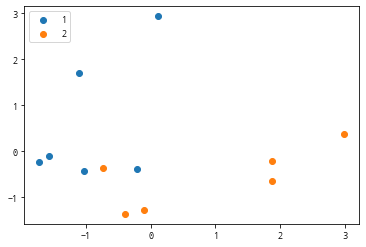

In [93]:
scatter_plot = plt.figure()
ax = scatter_plot.add_subplot(1, 1, 1)
for name, group in df2.groupby("반"):
    ax.scatter(group["PC1"], group["PC2"], marker = "o", label = name)
ax.legend(numpoints = 1, loc = "upper left")

plt.show()

[1 2 3 4 5 6 7 8 9]
[ 5 10 15 20 25 30 35 40 45]


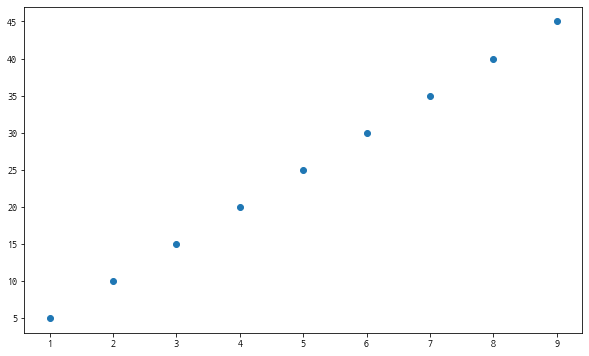

In [105]:
x = np.arange(1, 10)
print(x)
y = x * 5
print(y)

plt.figure(figsize = [10, 6])
plt.plot(x, y, "o")

plt.show()

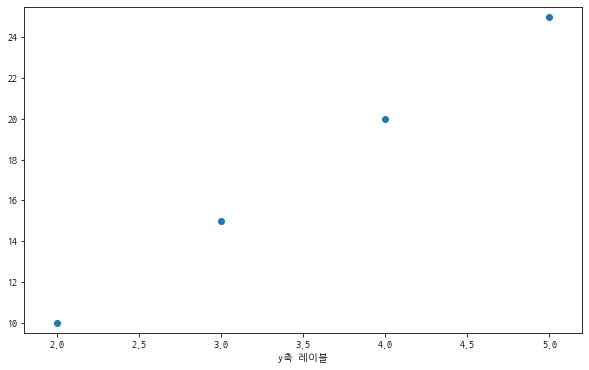

In [109]:
# 구간 확대
# 그래프는 입력되는 x, y의 최소, 최대 구간으로 자동으로 그려지는데, 이 구간을 키우거나 줄이기 위해 x, y의 구간을 정의할 수 있다.

plt.figure(figsize = [10, 6])
plt.plot(x, y, "o")
plt.xlabel("x축 레이블")
plt.xlabel("y축 레이블")
plt.xlim(1.8, 5.2)
plt.ylim(9.5, 25.5)

plt.show()

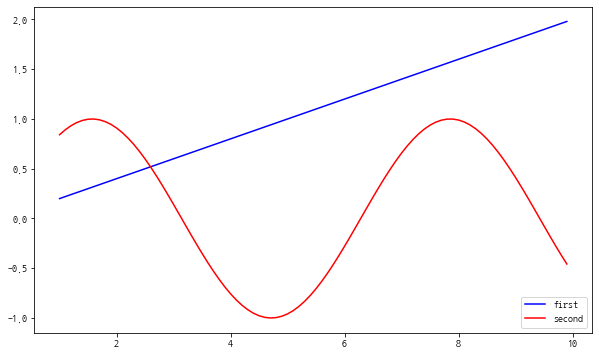

In [120]:
# 여러개의 그래프를 같이 그리기
# 같이 그리면 각 그래프가 구분이 안되기 때문에 그래프마다 라벨을 달고 벌례(legend)를 출력
x = np.arange(1, 10, 0.1)
y = x * 0.2
y2 = np.sin(x)

plt.figure(figsize = [10, 6])

plt.plot(x, y, "b", label = "first")
plt.plot(x, y2, "r", label = "second")
plt.legend(loc = "lower right")

plt.show()

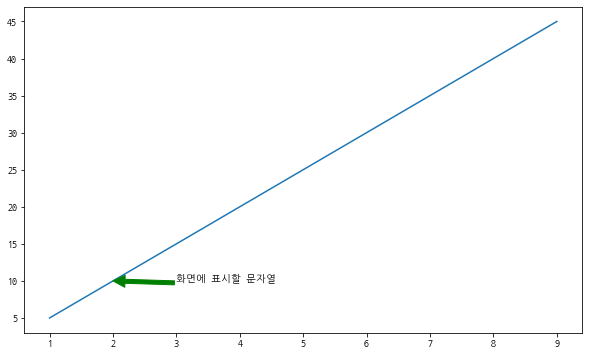

In [130]:
# 어노테이트
# 그래프에서 화살표를 그린 후 그 화살표에 문자를 출력하는 기능
x = np.arange(1, 10)
y = x * 5
plt.figure(figsize = [10, 6])
plt.plot(x, y)
plt.annotate("화면에 표시할 문자열", xy = (2, 10), xytext = (3, 10), arrowprops = {"color":"green"})

plt.show()

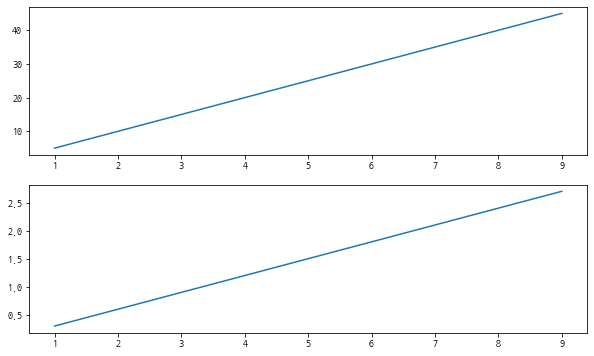

In [133]:
# subplot → 여러개의 그래프를 그리고 싶을 때 사용
# subplot은 그래프가 그려질 위치를 격자형으로 지정하는데 plt.subplot(nrow, ncol, position)와 같이 사용
# nrow, ncol은 그래프를 그릴 그림 패널의 크기를 행(nrow) * 열(ncol)로 지정하고 몇번째 위치(position)에 그릴지 를 지정해 주어야 한자 Z모양으로 1, 2, 3, 4 증가

x = np.arange(1, 10)
y = x * 5
plt.figure(figsize = [10, 6])
plt.subplot(2, 1, 1)
plt.plot(x, y)
y2 = x * 0.3
plt.subplot(2, 1, 2)
plt.plot(x, y2)

plt.show()

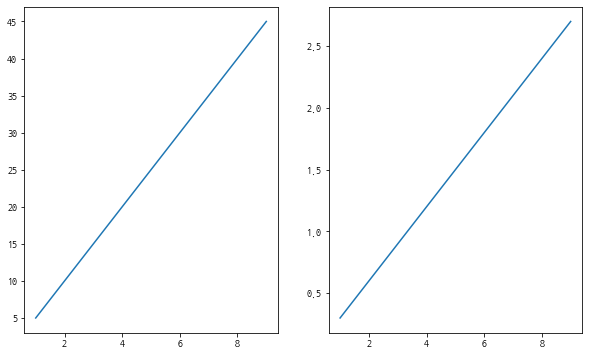

In [134]:
x = np.arange(1, 10)
y = x * 5
plt.figure(figsize = [10, 6])
plt.subplot(1, 2, 1)
plt.plot(x, y)
y2 = x * 0.3
plt.subplot(1, 2, 2)
plt.plot(x, y2)

plt.show()

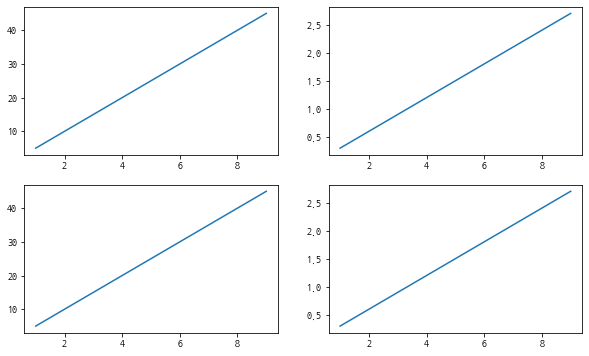

In [135]:
x = np.arange(1, 10)
y = x * 5
plt.figure(figsize = [10, 6])
plt.subplot(2, 2, 1)
plt.plot(x, y)
y2 = x * 0.3
plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.subplot(2, 2, 3)
plt.plot(x, y)
y2 = x * 0.3
plt.subplot(2, 2, 4)
plt.plot(x, y2)

plt.show()